In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from key_door import key_door_env
from key_door import visualisation_env

## Basic Environment Setup

### 2D Gridworld

In [3]:
grid_env = key_door_env.KeyDoorEnv(
    map_ascii_path="unc_mattar/maps/maze.txt",
    map_yaml_path="unc_mattar/maps/maze.yaml",
    representation="agent_position",
)

In [4]:
grid_env = visualisation_env.VisualisationEnv(grid_env)

In [5]:
state = grid_env.reset_environment()

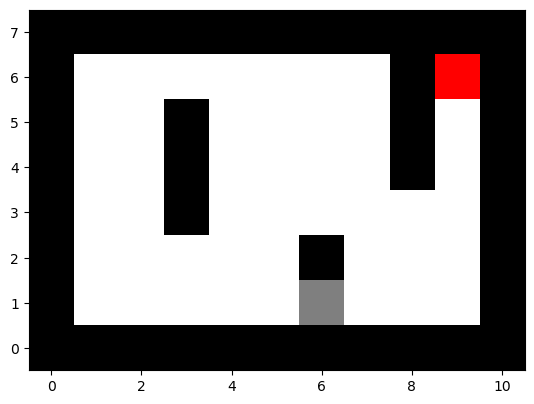

In [6]:
grid_env.render()

# Basic Q Learning

In [15]:
beta = 5
num_episodes = 100
gamma = 0.9
learning_rate = 1.

In [16]:
state_action_value_function = np.random.normal(scale=0.1, size=(len(grid_env.state_space), len(grid_env.action_space)))

state_id_mapping = {state: i for i, state in enumerate(grid_env.state_space)}
id_state_mapping = {i: state for i, state in enumerate(grid_env.state_space)}

In [17]:
def train_episode():

    episode_return = 0
    episode_length = 0

    state = grid_env.reset_environment()
    state_id = state_id_mapping[state]
    
    while grid_env.active:
        _softmax_values = np.exp(beta * state_action_value_function[state_id])
        softmax_values = _softmax_values / np.sum(_softmax_values)
        action = np.random.choice(a=range(len(grid_env.action_space)), p=softmax_values)

        reward, new_state = grid_env.step(action)
    
        if grid_env.active:
            discount = gamma
        else:
            discount = 0
    
        initial_value = state_action_value_function[state_id][action]
        new_state_id = state_id_mapping[new_state]
        new_sate_values = state_action_value_function[new_state_id]
        
        updated_value = initial_value + learning_rate * (reward + discount * np.max(new_sate_values) - initial_value)
        state_action_value_function[state_id] = updated_value
    
        state = new_state
        state_id = state_id_mapping[state]
        episode_return += reward
        episode_length += 1

    return episode_return, episode_length

In [18]:
def test_episode():

    episode_return = 0
    episode_length = 0

    state = grid_env.reset_environment()
    state_id = state_id_mapping[state]
    
    while grid_env.active:
        action = np.argmax(state_action_value_function[state_id])
        reward, new_state = grid_env.step(action)    
        state = new_state
        state_id = state_id_mapping[state]
        episode_return += reward
        episode_length += 1

    return episode_return, episode_length

In [19]:
train_episode_returns = []
train_episode_lengths = []

test_episode_returns = []
test_episode_lengths = []

for i in range(num_episodes):

    print(i)
    
    train_episode_return, train_episode_length = train_episode()
    # test_episode_return, test_episode_length = test_episode()
    
    train_episode_returns.append(train_episode_return)
    train_episode_lengths.append(train_episode_length)

    # test_episode_returns.append(test_episode_return)
    # test_episode_lengths.append(test_episode_length)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


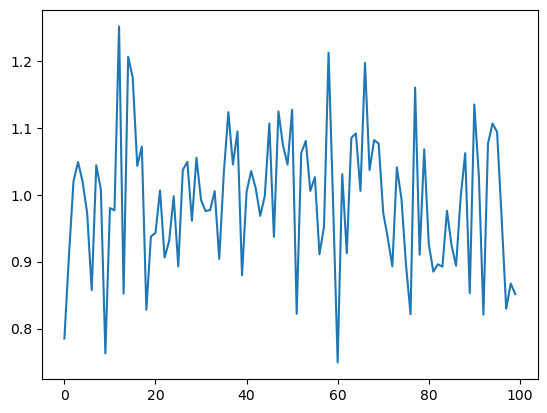

In [20]:
plt.plot(train_episode_returns)

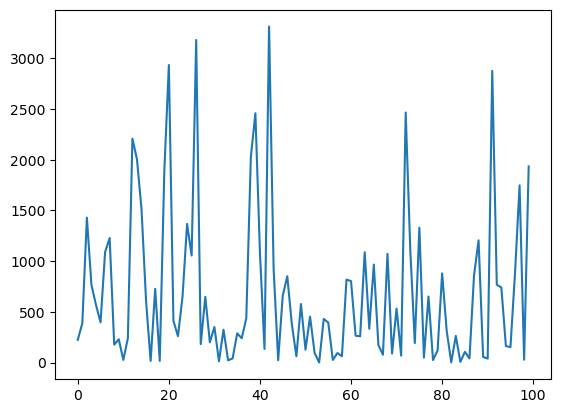

In [21]:
plt.plot(train_episode_lengths)

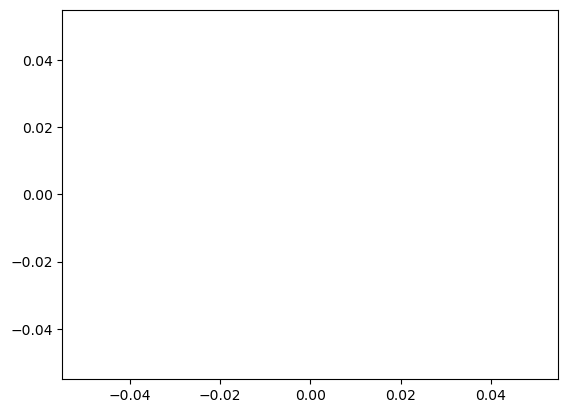

In [14]:
plt.plot(test_episode_returns)

In [ ]:
plt.plot(test_episode_lengths)

In [35]:
def gain(state_action_value_function, state_id, action, beta):
    new_state_action_value_function = copy.deepcopy(state_action_value_function)
    updated_value = X
    new_state_action_value_function[state_id][action] = updated_value
    
    _new_softmax = np.exp(beta * new_state_action_value_function[state_id])
    new_softmax = _new_softmax / np.sum(_new_softmax)

    _old_softmax = np.exp(beta * state_action_value_function[state_id])
    old_softmax = _old_softmax / np.sum(_old_softmax)

    gain = np.sum(new_state_action_value_function[state] * new_softmax) - np.sum(state_action_value_function[state] * old_softmax)

    return gain

In [36]:
def need(successor_matrix, state_id):
    return successor_matrix[state_id]

In [37]:
def evb(state_action_value_function, successor_matrix, state_id, action, beta):
    return gain(state_action_value_function, state_id, action, beta) * need(successor_matrix, state_id)